# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

(39209, 32, 32, 3) (39209,)
(12630, 32, 32, 3) (12630,)


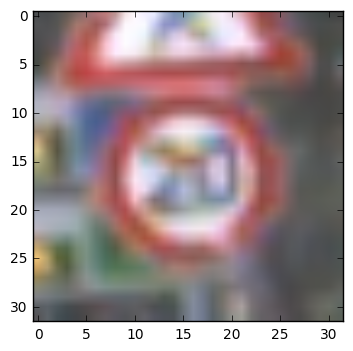

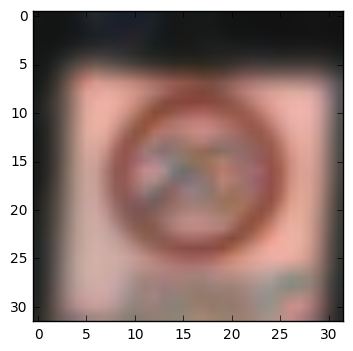

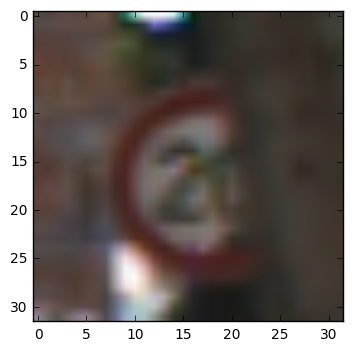

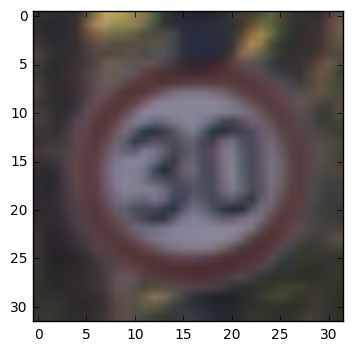

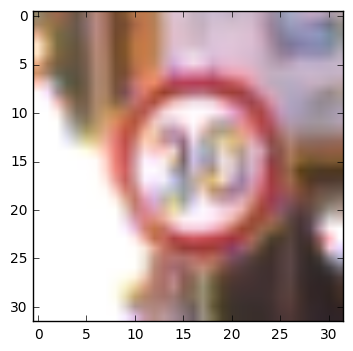

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "train.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

train_features, train_labels = X_train, y_train
test_features, test_labels = X_test, y_test

print(train_features.shape, train_labels.shape)
print(test_features.shape, test_labels.shape)

import matplotlib.pyplot as plt
for i in range(5):
    plt.imshow(train_features[i*90])
    plt.show()

In [2]:


## Step 1: Dataset Summary & Exploration

#The pickled data is a dictionary with 4 key/value pairs:

#- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
#- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
#- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
#- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

#Complete the basic data summary below.

In [3]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = train_features.shape[0]

# TODO: Number of testing examples.
n_test = test_features.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = train_features[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = max(train_labels) - min(train_labels) + 1

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

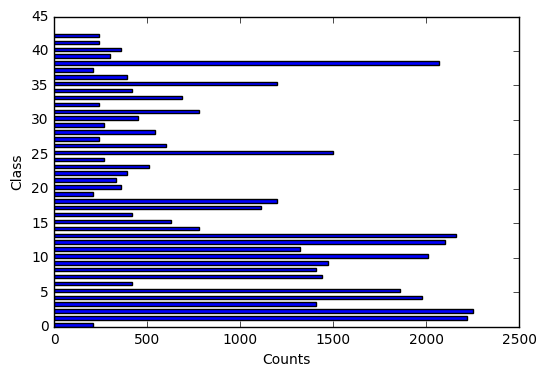

In [4]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np
# Visualizations will be shown in the notebook.
%matplotlib inline

def data_statics(train_labels, train_features, show_pic=False):
    class_names, counts = np.unique(train_labels, return_counts=True)
    plt.barh(class_names, counts, 0.5, align='edge')#, edgecolor='black')
    plt.xlabel('Counts')
    plt.ylabel('Class')
    plt.show()
    curr_index = 0
    if show_pic:
        for class_name, count in zip(class_names, counts):
            print('Class: ', class_name)
            plt.imshow(train_features[curr_index])
            plt.show()
            curr_index += count
data_statics(train_labels, train_features)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

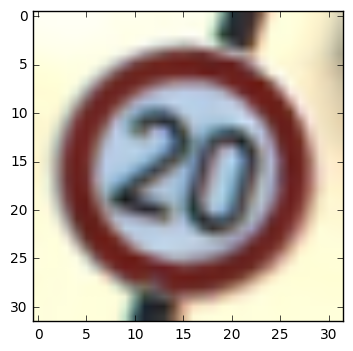

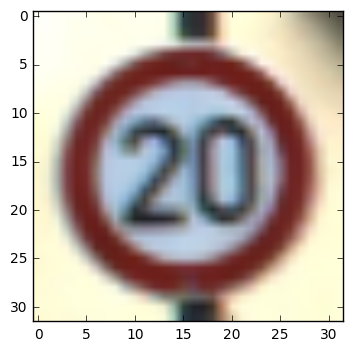

In [5]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

# to make sure class0 to class42 all have roughly the same amount of picutres

from PIL import Image
import scipy.ndimage

def rotate_img(img_data, rotate_angle):
    return scipy.ndimage.rotate(img_data, rotate_angle, reshape=False, mode='nearest')

# Test rotate_img
img_data = train_features[123]

plt.imshow(rotate_img(img_data, -17))
plt.show()
plt.imshow(img_data)
plt.show()

    

In [11]:
import math
import random

class_names, counts = np.unique(train_labels, return_counts=True)
max_count = np.max(counts)
rotated_train_features = list()
rotated_train_labels = list()
index = 0
for class_name, count in zip(class_names, counts):
    count_ratio = math.ceil(max_count/count)-1
    
    if count_ratio>1:
        random_angle_list = random.sample([-21, -18, -15, -10, -5, 5, 10, 15, 18, 21], count_ratio)
        #print(class_name, count_ratio, random_angle_list)
        for i in range(count):
            img_data = train_features[index + i]
            for angle in random_angle_list:
                rotated_train_features.append(rotate_img(img_data, angle))
                rotated_train_labels.append(class_name)
    index += count


rotated labels: 54957 rotated features: 54957


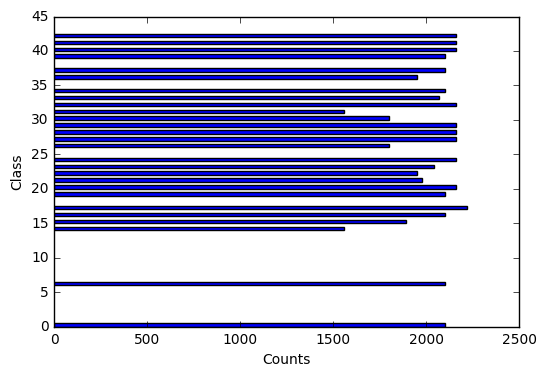

Class:  0


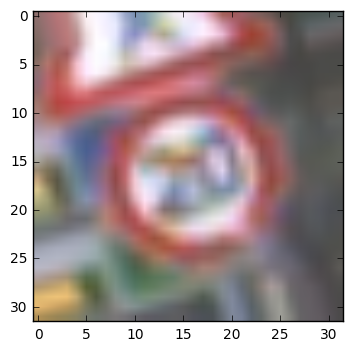

Class:  6


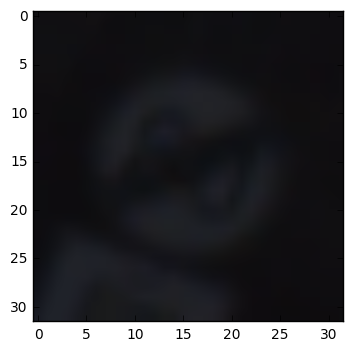

Class:  14


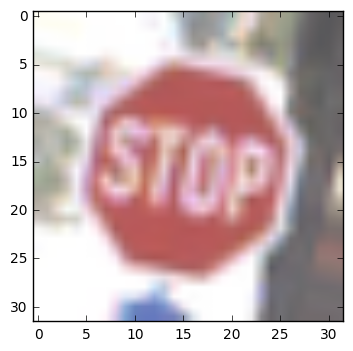

Class:  15


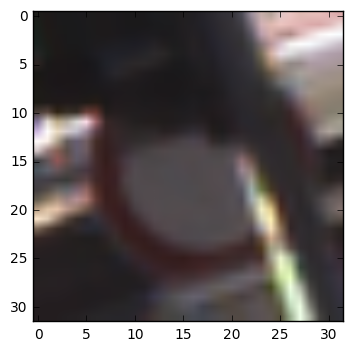

Class:  16


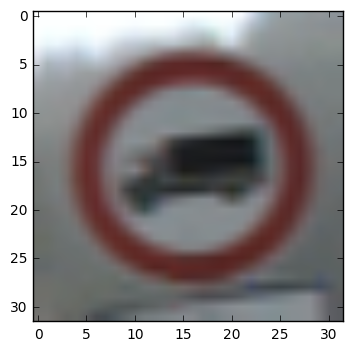

Class:  17


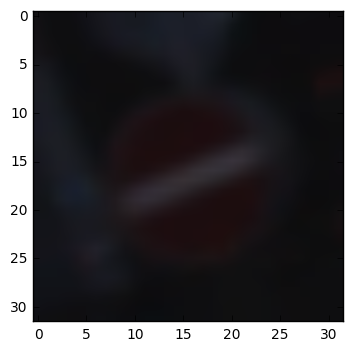

Class:  19


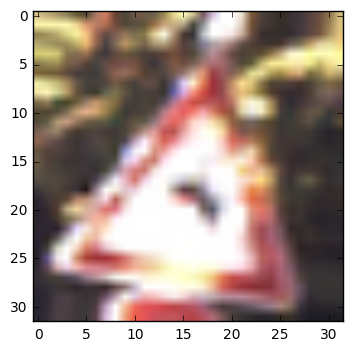

Class:  20


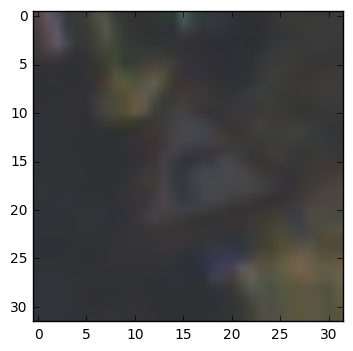

Class:  21


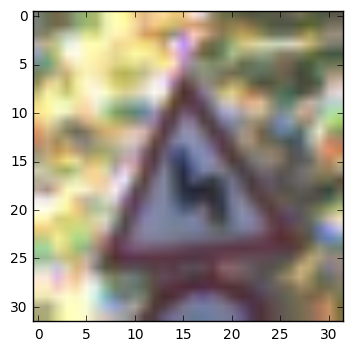

Class:  22


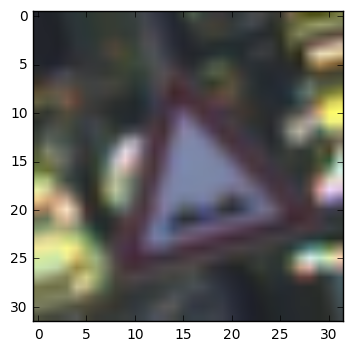

Class:  23


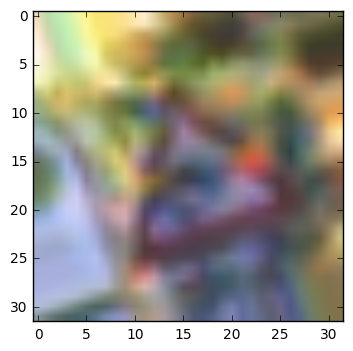

Class:  24


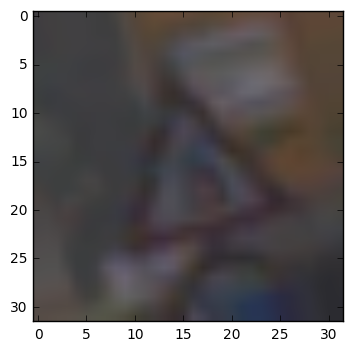

Class:  26


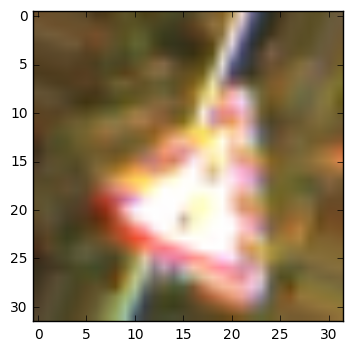

Class:  27


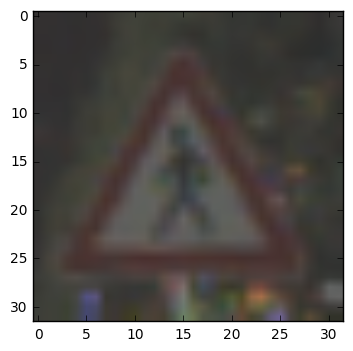

Class:  28


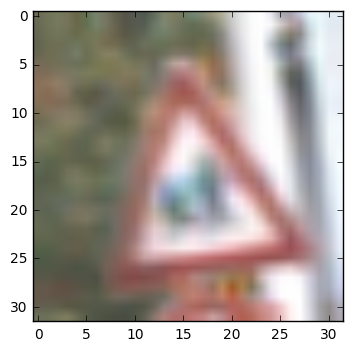

Class:  29


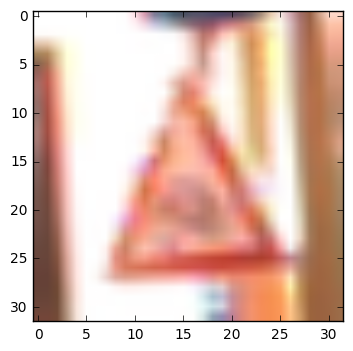

Class:  30


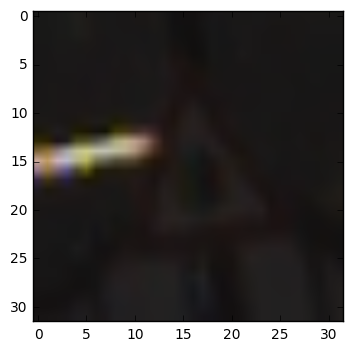

Class:  31


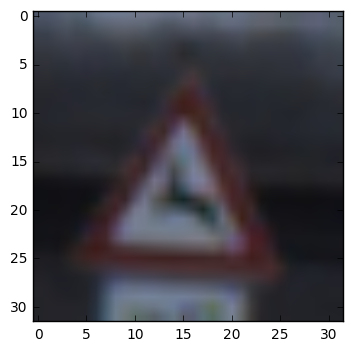

Class:  32


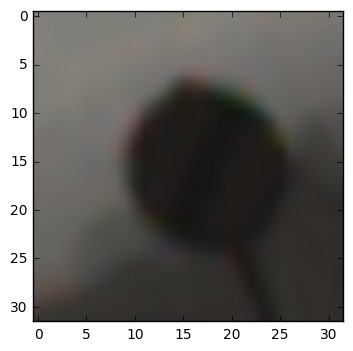

Class:  33


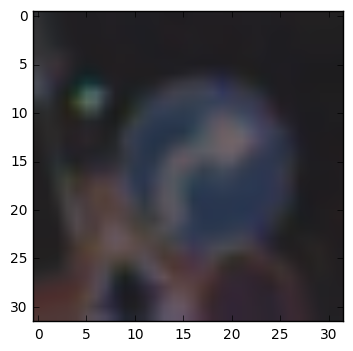

Class:  34


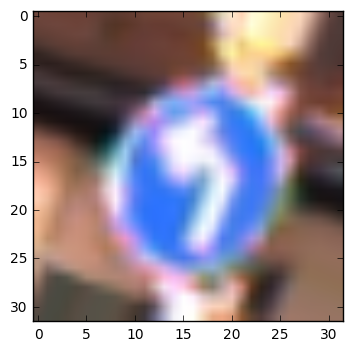

Class:  36


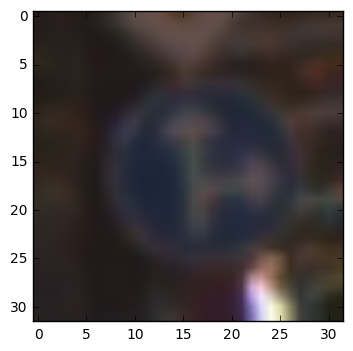

Class:  37


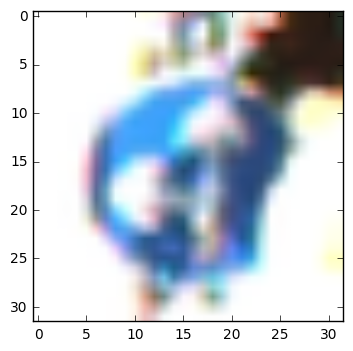

Class:  39


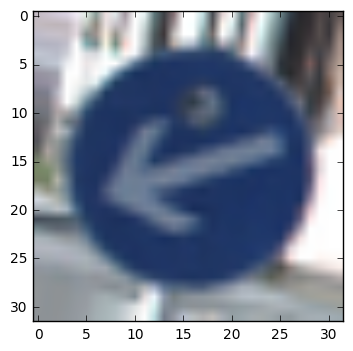

Class:  40


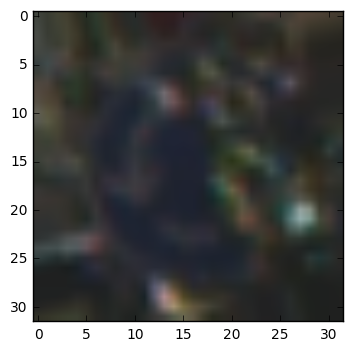

Class:  41


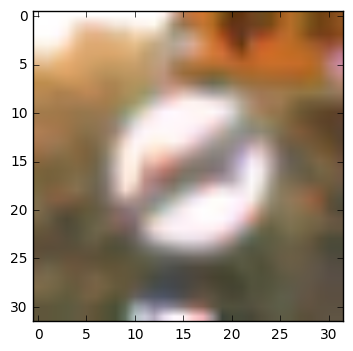

Class:  42


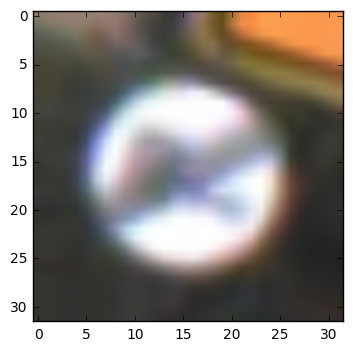

In [7]:
# Verify the rotation 
print("rotated labels:", len(rotated_train_labels), "rotated features:", len(rotated_train_features))
data_statics(rotated_train_labels, rotated_train_features, True)

In [8]:
# jupyter lost my data again....
# Save the new data to pickle
training_file = "new_train.p"
SAVE_NEW_TRAIN = True
if SAVE_NEW_TRAIN:
    train_features_ = np.append(train_features, rotated_train_features, axis=0)
    train_labels_ = np.append(train_labels, rotated_train_labels, axis=0)
    with open(training_file, mode='wb') as w:
        pickle.dump({"features": train_features_, "labels": train_labels_}, w)

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
    
new_train_features, new_train_labels = train['features'], train['labels']


old train_feature: (75332, 32, 32, 3) old train_labels: (75332,)


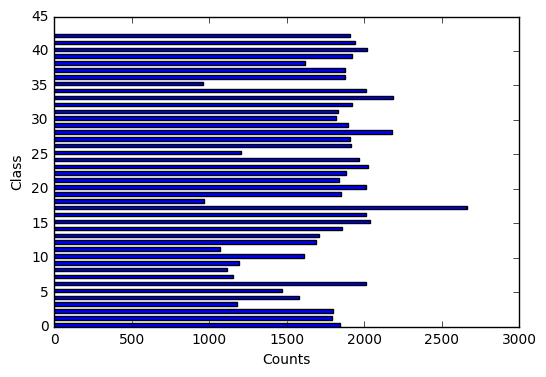

new_train_features: (94166, 32, 32, 3) new_train_labels: (94166,)


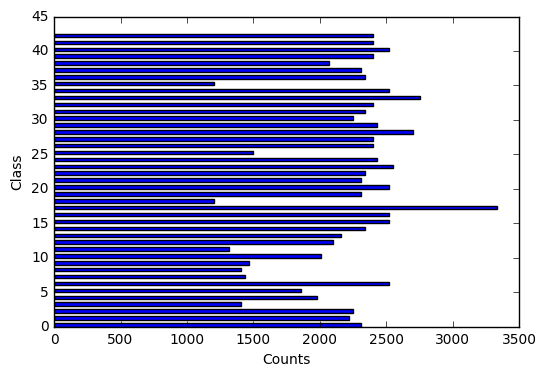

In [12]:
origin_train_features = train_features
origin_train_labels = train_labels
print("old train_feature:", origin_train_features.shape, "old train_labels:", origin_train_labels.shape)
data_statics(origin_train_labels, origin_train_features)
print("new_train_features:", new_train_features.shape, "new_train_labels:", new_train_labels.shape)
data_statics(new_train_labels, new_train_features)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

In Cell[4] you will note that some classes have very small amount of tranning data (e.g classID-0). so I "faked" more training images for those classes. Rotating those photos with small angles is a good way to create the additional data.
Then use train_test_split function in sklern module to randomize the data.


**Answer:**

train_features: (75332, 32, 32, 3) train_labels: (75332,)


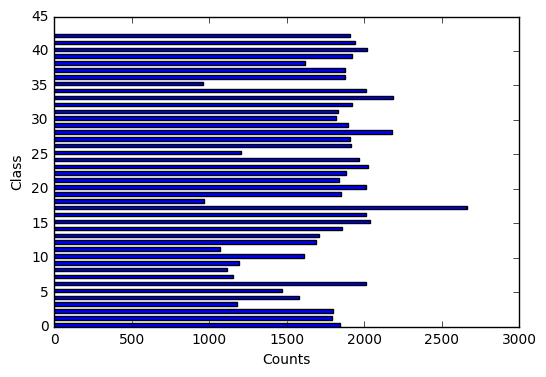

valid_features: (18834, 32, 32, 3) valid_labels: (18834,)


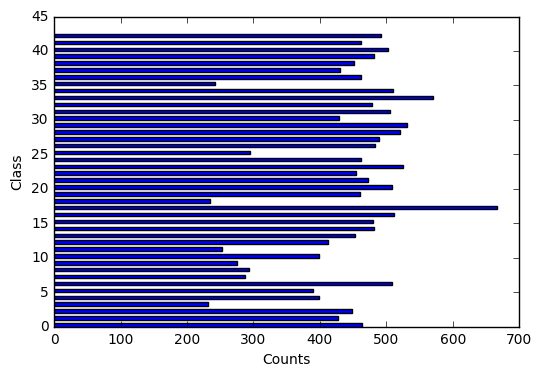

In [10]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

# Split into training and test set by 80/20
from sklearn.model_selection import train_test_split
train_features, valid_features, train_labels, valid_labels = train_test_split(
   new_train_features,
   new_train_labels,
   test_size=0.2,
   random_state=42
)

print("train_features:", train_features.shape, "train_labels:", train_labels.shape)
data_statics(train_labels, train_features)
print("valid_features:", valid_features.shape, "valid_labels:", valid_labels.shape)
data_statics(valid_labels, valid_features)



### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_



**Answer:** I use train_test_split function from sklearn module to randomize the data and grab 20% of trainning data as validation data. 


In [27]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.contrib.layers import flatten
import sys
import numpy as np

EPOCHS = 35
BATCH_SIZE = 100

n_train = train_features.shape[0]
n_valid = valid_features.shape[0]
n_test = test_features.shape[0]
image_shape = train_features[0].shape
n_classes = max(train_labels) - min(train_labels) + 1

print("Number of training examples =", n_train)
print("Number of validate examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

# Convert label list to 2-D array
# [0,1,3] ==> [[1,0,0,...], [0,1,0,...], [0,0,0,1,0,...]]
def conv_to_array(index_list):
    if type(index_list) is np.ndarray:
        index_list = list(index_list.flatten())
    n_row = len(index_list)
    new_array = np.zeros([n_row, n_classes], int)
    for row_index, col_index_val in enumerate(index_list):
        new_array[row_index][col_index_val] = 1
    return new_array


Number of training examples = 75332
Number of validate examples = 18834
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [28]:
# LeNet architecture:
# INPUT -> CONV1 -> RELU -> POOL -> CONV2 -> RELU -> POOL -> CONV3 -> RELU -> FLATTEN -> FC1 -> RELU -> DROPOUT -> FC2
def LeNet(x):
    # 32x32x3  --> 28x28x32
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 32), stddev=0.05))
    conv1_b = tf.Variable(tf.zeros(32))
    conv1 = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    conv1 = tf.nn.relu(conv1)

    # 28x28x32 --> 14x14x32
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # 14x14x32 --> 10x10x64
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 32, 64), stddev=0.05))
    conv2_b = tf.Variable(tf.zeros(64))
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    conv2 = tf.nn.relu(conv2)

    # 10x10x64 --> 5x5x64
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # 5x5x64  --> 1x1x128
    conv3_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 64, 128), stddev=0.05))
    conv3_b = tf.Variable(tf.zeros(128))
    conv3 = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    conv3 = tf.nn.relu(conv3)

    # Flatten
    fc1 = flatten(conv3)
    # (1 * 1 * 128, 512)
    fc1_shape = (fc1.get_shape().as_list()[-1], 512)
    fc1_W = tf.Variable(tf.truncated_normal(shape=(fc1_shape), stddev=0.05))
    fc1_b = tf.Variable(tf.zeros(512))
    fc1 = tf.matmul(fc1, fc1_W) + fc1_b
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, 0.8)

    fc2_W = tf.Variable(tf.truncated_normal(shape=(512, 43), stddev=0.05))
    fc2_b = tf.Variable(tf.zeros(43))
    fc2 = tf.matmul(fc1, fc2_W) + fc2_b
    return fc2

# 32x32x3, RGB images
x = tf.placeholder(tf.float32, (None, 32,32,3))
# Classify on 43 traffic signs
y = tf.placeholder(tf.float32, (None, 43))
fc2 = LeNet(x)

loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(fc2, y))
opt = tf.train.AdamOptimizer()
train_op = opt.minimize(loss_op)
correct_prediction = tf.equal(tf.argmax(fc2, 1), tf.argmax(y, 1))
accuracy_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


def eval_data(test_features, test_labels):
    """
    Given a dataset as input returns the loss and accuracy.
    """
    # If dataset.num_examples is not divisible by BATCH_SIZE
    # the remainder will be discarded.
    # Ex: If BATCH_SIZE is 64 and training set has 55000 examples
    # steps_per_epoch = 55000 // 64 = 859
    # num_examples = 859 * 64 = 54976
    #
    # So in that case we go over 54976 examples instead of 55000.
    num_features = test_features.shape[0]
    assert num_features == test_labels.shape[0]

    steps_per_epoch = num_features // BATCH_SIZE
    num_examples = steps_per_epoch * BATCH_SIZE
    total_acc = 0
    total_loss = 0
    index = 0
    sess = tf.get_default_session()
    for step in range(steps_per_epoch):
        batch_train = test_features[index:index+BATCH_SIZE]
        batch_label = test_labels[index:index+BATCH_SIZE]
        batch_label = conv_to_array(batch_label)
        loss, acc = sess.run([loss_op, accuracy_op], feed_dict={x: batch_train, y: batch_label})
        total_acc += (acc * batch_train.shape[0])
        total_loss += (loss * batch_train.shape[0])
        index += BATCH_SIZE

    return total_loss/num_examples, total_acc/num_examples

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
LeNet architecture:
INPUT -> CONV1 -> RELU -> POOL -> CONV2 -> RELU -> POOL -> CONV3 -> RELU -> FLATTEN -> Full-Connect1 -> RELU -> DROPOUT -> FC2

In [29]:

### Train your model here.
### Feel free to use as many code cells as needed.
save_file = 'p2_model.ckpt'
saver = tf.train.Saver()
CREATE_SAVED_CKPT = 1   

if CREATE_SAVED_CKPT:
    with tf.Session() as sess:
        sess.run(tf.initialize_all_variables())
        steps_per_epoch = n_train // BATCH_SIZE
        num_examples = steps_per_epoch * BATCH_SIZE
        print("num_examples", num_examples, "steps_per_epoch", steps_per_epoch, "BATCH_SIZE", BATCH_SIZE, "EPOCHS", EPOCHS)

        # Train model
        for i in range(EPOCHS):
            index = 0
            for step in range(steps_per_epoch):
                batch_train = train_features[index:index+BATCH_SIZE]
                batch_label = train_labels[index:index+BATCH_SIZE]
                batch_label = conv_to_array(batch_label)
                loss = sess.run(train_op, feed_dict={x: batch_train, y: batch_label})
                index += BATCH_SIZE

            print("===============================")
            val_loss, val_acc = eval_data(valid_features, valid_labels)
            print(" EPOCH {} ...".format(i+1))
            print(" Validation loss = {:.3f}".format(val_loss))
            print(" Validation accuracy = {:.3f}".format(val_acc))
            print()
        print("ALL DONE!!")
        saver.save(sess, save_file)
        # Evaluate on the test data
        test_loss, test_acc = eval_data(test_features, test_labels)
        print("Test loss = {:.3f}".format(test_loss))
        print("Test accuracy = {:.3f}".format(test_acc))
else:
    with tf.Session() as sess:
        # Load the weights and bias
        saver.restore(sess, save_file)
        # Evaluate on the test data
        test_loss, test_acc = eval_data(test_features, test_labels)
        print("Test loss = {:.3f}".format(test_loss))
        print("Test accuracy = {:.3f}".format(test_acc))
    

num_examples 75300 steps_per_epoch 753 BATCH_SIZE 100 EPOCHS 35
 EPOCH 1 ...
 Validation loss = 0.158
 Validation accuracy = 0.959

 EPOCH 2 ...
 Validation loss = 0.110
 Validation accuracy = 0.970

 EPOCH 3 ...
 Validation loss = 0.087
 Validation accuracy = 0.979

 EPOCH 4 ...
 Validation loss = 0.069
 Validation accuracy = 0.984

 EPOCH 5 ...
 Validation loss = 0.101
 Validation accuracy = 0.978

 EPOCH 6 ...
 Validation loss = 0.093
 Validation accuracy = 0.984

 EPOCH 7 ...
 Validation loss = 0.089
 Validation accuracy = 0.983

 EPOCH 8 ...
 Validation loss = 0.060
 Validation accuracy = 0.989

 EPOCH 9 ...
 Validation loss = 0.059
 Validation accuracy = 0.989

 EPOCH 10 ...
 Validation loss = 0.086
 Validation accuracy = 0.984

 EPOCH 11 ...
 Validation loss = 0.101
 Validation accuracy = 0.984

 EPOCH 12 ...
 Validation loss = 0.163
 Validation accuracy = 0.971

 EPOCH 13 ...
 Validation loss = 0.098
 Validation accuracy = 0.985

 EPOCH 14 ...
 Validation loss = 0.194
 Validati

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**  steps_per_epoch 753, BATCH_SIZE 100, EPOCHS 35, And I use AdamOptimizer learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-08, use_locking=False  

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
I choose to use LeNet.
To verify my network is able to run I just used one convolution layers and trained it with a very small dataset. Then I used three convolution layers and two pooling layers between them and adjusted the filter size and strides to increase the accuracy. 


---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [30]:
# Try if the SAVER works
with tf.Session() as sess:
    # Load the weights and bias
    saver.restore(sess, save_file)
    # Evaluate on the test data
    test_loss, test_acc = eval_data(test_features, test_labels)
    print("Test loss = {:.3f}".format(test_loss))
    print("Test accuracy = {:.3f}".format(test_acc))

Test loss = 1.875
Test accuracy = 0.932


In [38]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import cv2
import csv
import os
import matplotlib.pyplot as plt

# load csv then generate the sign dictionary {classID: SignName}
def generate_sign_dict(csv_path):
    sign_dict = dict()
    with open(csv_path, 'r') as f:
        reader = csv.reader(f)
        for i in reader:
            if i[0].isdigit():
                sign_dict[int(i[0])]=i[1]
    return sign_dict

# resize the image to 32x32 by using cv2.INTER_AREA
def generate_test_data(image_path):
    ori_image = cv2.imread(image_path)
    newx, newy = 32, 32  
    new_image = cv2.resize(ori_image, (newx, newy), interpolation = cv2.INTER_AREA)
    new_image = cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)
    return new_image

# finally...
def verify_model(image_data, sign_dict):
    img_np_data = np.zeros((1, 32, 32, 3))
    img_np_data[0] = image_data
    sess = tf.get_default_session()
    prediction = sess.run(tf.argmax(fc2, 1), feed_dict={x: img_np_data})
    print("Prediction ==> ClassID: {0} SignName: {1}".format(prediction[0], sign_dict[prediction[0]]))
    plt.imshow(image_data)
    plt.show()


bumpy_road.jpg
Prediction ==> ClassID: 22 SignName: Bumpy road


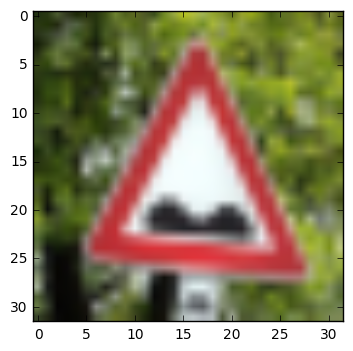

children_crossing.jpg
Prediction ==> ClassID: 28 SignName: Children crossing


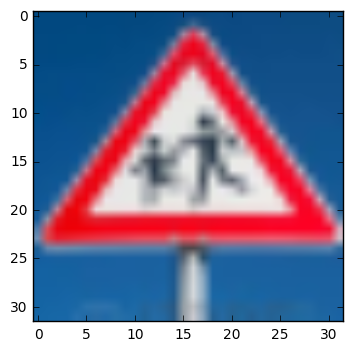

dangerous_curve_left.jpg
Prediction ==> ClassID: 20 SignName: Dangerous curve to the right


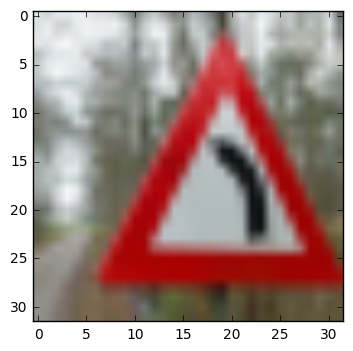

keep_left.jpg
Prediction ==> ClassID: 39 SignName: Keep left


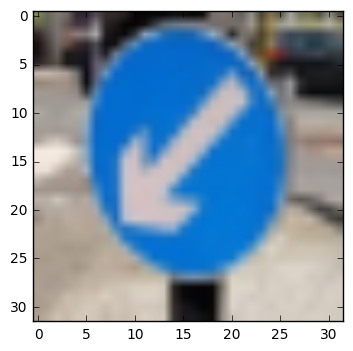

limit_120.jpg
Prediction ==> ClassID: 8 SignName: Speed limit (120km/h)


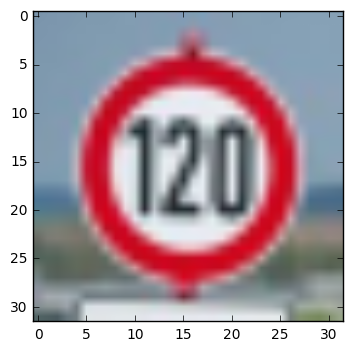

limit_70.jpg
Prediction ==> ClassID: 4 SignName: Speed limit (70km/h)


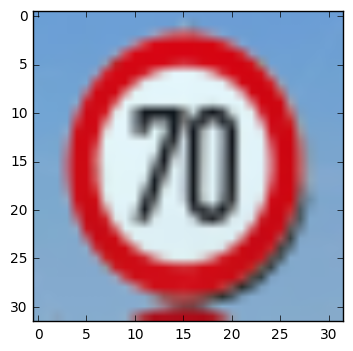

no_vechiles.jpg
Prediction ==> ClassID: 15 SignName: No vechiles


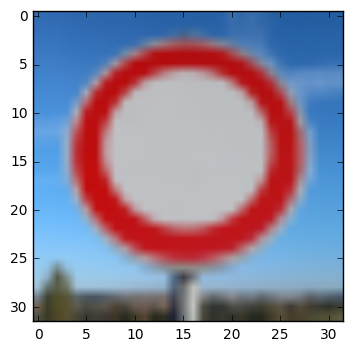

roadwork.jpg
Prediction ==> ClassID: 25 SignName: Road work


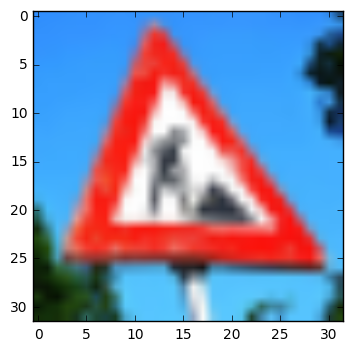

slippery_road.jpg
Prediction ==> ClassID: 23 SignName: Slippery road


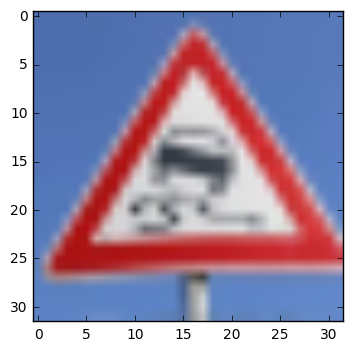

stop.jpg
Prediction ==> ClassID: 14 SignName: Stop


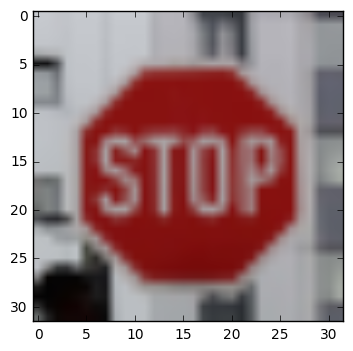

In [40]:
csv_file = "signnames.csv"
sign_dict = generate_sign_dict(csv_file)
with tf.Session() as sess:
    # Load the weights and bias
    saver.restore(sess, save_file)
    # Evaluate on the test data
    test_img_dir = "./test_image"
    for root, dirs, files in os.walk(test_img_dir):
        for file in files:
            file_path = os.path.join(root, file)
            if os.path.splitext(file_path)[-1] == ".jpg":
                print(file)
                img_data = generate_test_data(file_path)
                verify_model(img_data, sign_dict)
                print("======"*8)


In [41]:
# I just downloaded the images via google randomly.
# ... All match.... Except the dangerous_curve_left picture


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [43]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
# Please check the Cell [40]
# I ran the code there

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

bumpy_road.jpg
Prediction ==> ClassID: 22 SignName: Bumpy road
SOFTMAX
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]]


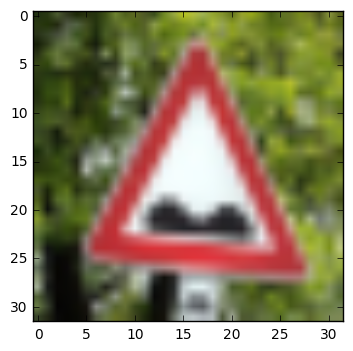

children_crossing.jpg
Prediction ==> ClassID: 28 SignName: Children crossing
SOFTMAX
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]]


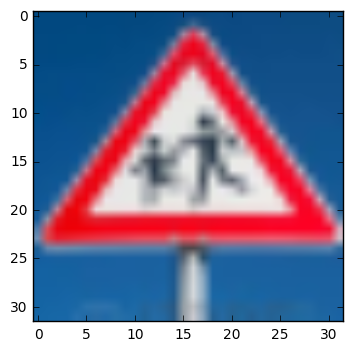

dangerous_curve_left.jpg
Prediction ==> ClassID: 20 SignName: Dangerous curve to the right
SOFTMAX
[[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   7.25603189e-10
    1.00000000e+00   0.00000000e+00   1.61588633e-33   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   1.98228427e-30   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00]]


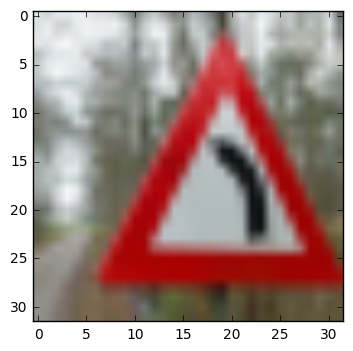

keep_left.jpg
Prediction ==> ClassID: 39 SignName: Keep left
SOFTMAX
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  1.  0.  0.  0.]]


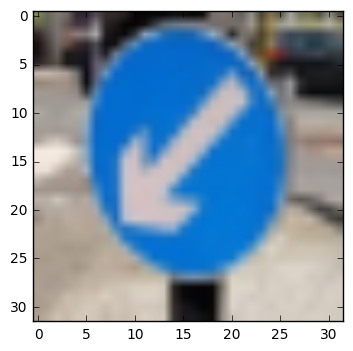

limit_120.jpg
Prediction ==> ClassID: 8 SignName: Speed limit (120km/h)
SOFTMAX
[[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]]


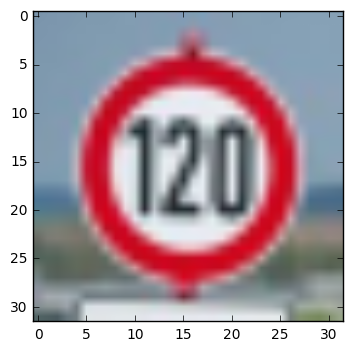

limit_70.jpg
Prediction ==> ClassID: 4 SignName: Speed limit (70km/h)
SOFTMAX
[[  2.41014273e-22   5.98222055e-02   4.34745420e-15   0.00000000e+00
    9.40177858e-01   4.27627918e-32   0.00000000e+00   1.68596930e-29
    3.39239620e-29   0.00000000e+00   1.29839780e-33   0.00000000e+00
    0.00000000e+00   0.00000000e+00   2.40677932e-15   2.51496278e-22
    0.00000000e+00   0.00000000e+00   6.50537668e-29   0.00000000e+00
    0.00000000e+00   3.62936111e-29   0.00000000e+00   0.00000000e+00
    1.31723828e-29   0.00000000e+00   8.71778832e-13   7.68637162e-23
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    9.30380961e-38   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00]]


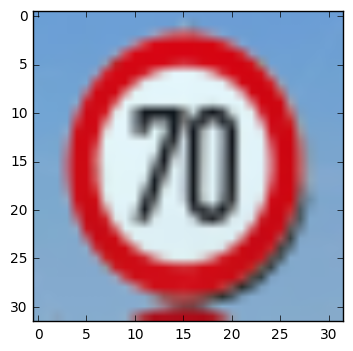

no_vechiles.jpg
Prediction ==> ClassID: 15 SignName: No vechiles
SOFTMAX
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]]


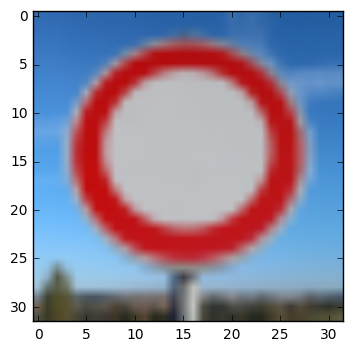

roadwork.jpg
Prediction ==> ClassID: 25 SignName: Road work
SOFTMAX
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]]


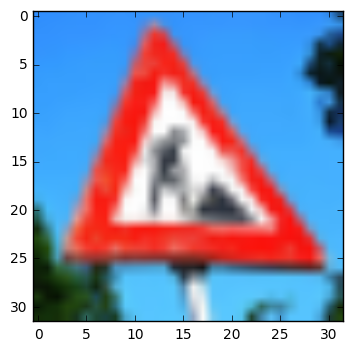

slippery_road.jpg
Prediction ==> ClassID: 23 SignName: Slippery road
SOFTMAX
[[  2.89133181e-24   6.80095013e-27   1.41506484e-23   1.55737675e-26
    1.03281132e-36   1.22163049e-25   0.00000000e+00   0.00000000e+00
    0.00000000e+00   3.10008189e-21   4.55688342e-24   9.54582361e-37
    1.62504940e-38   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   1.66561827e-23
    4.96990736e-30   6.17211399e-23   0.00000000e+00   1.00000000e+00
    2.42967284e-37   1.11519736e-23   2.14300555e-33   3.63080677e-31
    3.45092349e-26   7.28629145e-33   2.17979370e-26   2.56109272e-14
    1.07863656e-32   0.00000000e+00   0.00000000e+00   0.00000000e+00
    5.01882226e-34   3.07659668e-32   0.00000000e+00   0.00000000e+00
    2.47276386e-26   0.00000000e+00   7.08329744e-25]]


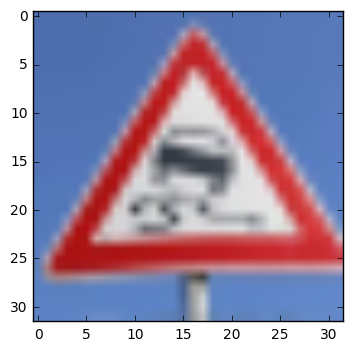

stop.jpg
Prediction ==> ClassID: 14 SignName: Stop
SOFTMAX
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]]


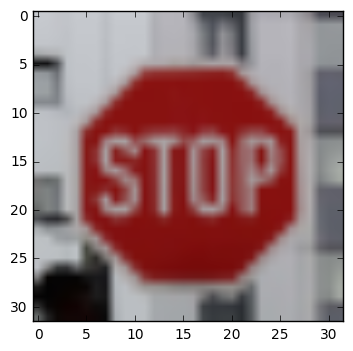

In [45]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
def verify_model_softmax(image_data, sign_dict):
    img_np_data = np.zeros((1, 32, 32, 3))
    img_np_data[0] = image_data
    sess = tf.get_default_session()
    prediction, softmax = sess.run([tf.argmax(fc2, 1), tf.nn.softmax(fc2)], feed_dict={x: img_np_data})
    
    print("Prediction ==> ClassID: {0} SignName: {1}".format(prediction[0], sign_dict[prediction[0]]))
    print("SOFTMAX")
    print(softmax)
    plt.imshow(image_data)
    plt.show()

csv_file = "signnames.csv"
sign_dict = generate_sign_dict(csv_file)
with tf.Session() as sess:
    # Load the weights and bias
    saver.restore(sess, save_file)
    # Evaluate on the test data
    test_img_dir = "./test_image"
    for root, dirs, files in os.walk(test_img_dir):
        for file in files:
            file_path = os.path.join(root, file)
            if os.path.splitext(file_path)[-1] == ".jpg":
                print(file)
                img_data = generate_test_data(file_path)
                verify_model_softmax(img_data, sign_dict)
                print("======"*8)

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

bumpy_road.jpg
Prediction 0 ==> ClassID: 22 SignName: Bumpy road
Prediction 1 ==> ClassID: 29 SignName: Bicycles crossing
Prediction 2 ==> ClassID: 25 SignName: Road work
TOP 3
TopKV2(values=array([[ 676.43139648,  133.16748047,   92.13387299]], dtype=float32), indices=array([[22, 29, 25]], dtype=int32))


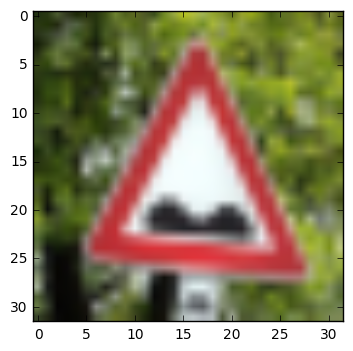

children_crossing.jpg
Prediction 0 ==> ClassID: 28 SignName: Children crossing
Prediction 1 ==> ClassID: 20 SignName: Dangerous curve to the right
Prediction 2 ==> ClassID: 5 SignName: Speed limit (80km/h)
TOP 3
TopKV2(values=array([[ 90.17340851,  19.47379494,  14.11991119]], dtype=float32), indices=array([[28, 20,  5]], dtype=int32))


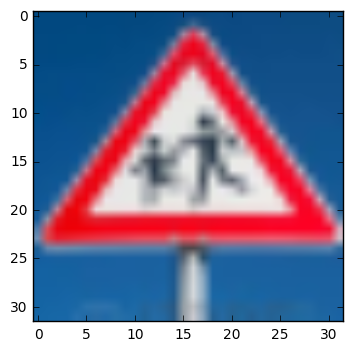

dangerous_curve_left.jpg
Prediction 0 ==> ClassID: 20 SignName: Dangerous curve to the right
Prediction 1 ==> ClassID: 19 SignName: Dangerous curve to the left
Prediction 2 ==> ClassID: 22 SignName: Bumpy road
TOP 3
TopKV2(values=array([[ 67.24894714,  55.37509537,   7.51434803]], dtype=float32), indices=array([[20, 19, 22]], dtype=int32))


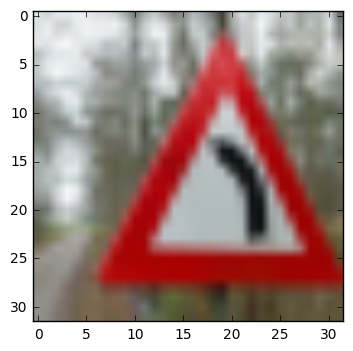

keep_left.jpg
Prediction 0 ==> ClassID: 39 SignName: Keep left
Prediction 1 ==> ClassID: 37 SignName: Go straight or left
Prediction 2 ==> ClassID: 31 SignName: Wild animals crossing
TOP 3
TopKV2(values=array([[ 329.56045532,   92.7035675 ,   54.96086121]], dtype=float32), indices=array([[39, 37, 31]], dtype=int32))


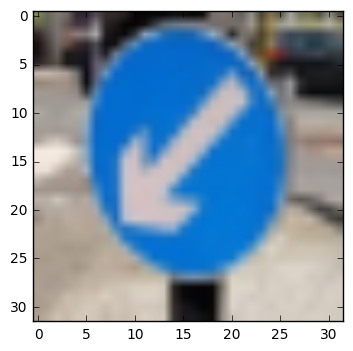

limit_120.jpg
Prediction 0 ==> ClassID: 8 SignName: Speed limit (120km/h)
Prediction 1 ==> ClassID: 7 SignName: Speed limit (100km/h)
Prediction 2 ==> ClassID: 5 SignName: Speed limit (80km/h)
TOP 3
TopKV2(values=array([[ 464.98413086,  194.74742126,   17.4476738 ]], dtype=float32), indices=array([[8, 7, 5]], dtype=int32))


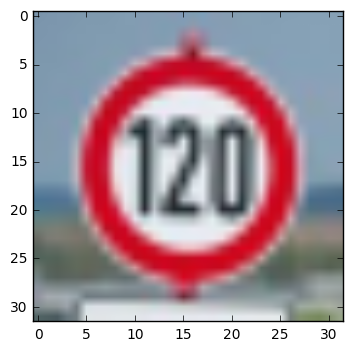

limit_70.jpg
Prediction 0 ==> ClassID: 4 SignName: Speed limit (70km/h)
Prediction 1 ==> ClassID: 1 SignName: Speed limit (30km/h)
Prediction 2 ==> ClassID: 26 SignName: Traffic signals
TOP 3
TopKV2(values=array([[ 57.23318863,  48.9103508 ,  20.74421883]], dtype=float32), indices=array([[ 4,  1, 26]], dtype=int32))


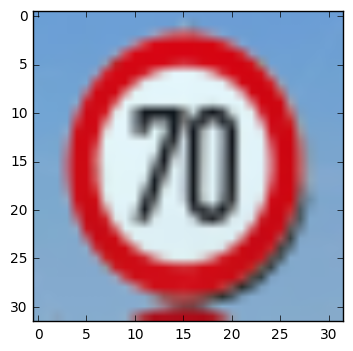

no_vechiles.jpg
Prediction 0 ==> ClassID: 15 SignName: No vechiles
Prediction 1 ==> ClassID: 4 SignName: Speed limit (70km/h)
Prediction 2 ==> ClassID: 13 SignName: Yield
TOP 3
TopKV2(values=array([[ 372.90368652,  101.27521515,   57.75795746]], dtype=float32), indices=array([[15,  4, 13]], dtype=int32))


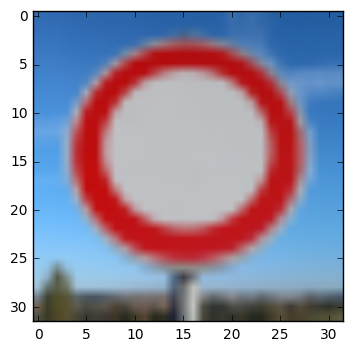

roadwork.jpg
Prediction 0 ==> ClassID: 25 SignName: Road work
Prediction 1 ==> ClassID: 22 SignName: Bumpy road
Prediction 2 ==> ClassID: 20 SignName: Dangerous curve to the right
TOP 3
TopKV2(values=array([[ 433.03164673,   71.11178589,   39.69689178]], dtype=float32), indices=array([[25, 22, 20]], dtype=int32))


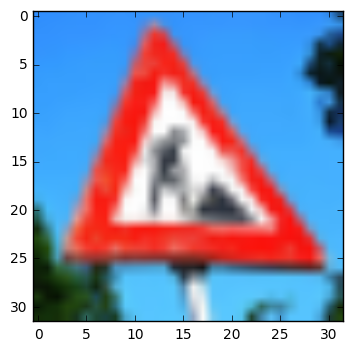

slippery_road.jpg
Prediction 0 ==> ClassID: 23 SignName: Slippery road
Prediction 1 ==> ClassID: 31 SignName: Wild animals crossing
Prediction 2 ==> ClassID: 2 SignName: Speed limit (50km/h)
TOP 3
TopKV2(values=array([[ 60.78325653,  12.8738718 ,   3.28738904]], dtype=float32), indices=array([[23, 31,  2]], dtype=int32))


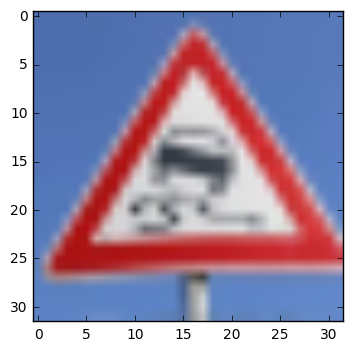

stop.jpg
Prediction 0 ==> ClassID: 14 SignName: Stop
Prediction 1 ==> ClassID: 29 SignName: Bicycles crossing
Prediction 2 ==> ClassID: 21 SignName: Double curve
TOP 3
TopKV2(values=array([[ 355.27047729,  -39.18596268,  -47.46548462]], dtype=float32), indices=array([[14, 29, 21]], dtype=int32))


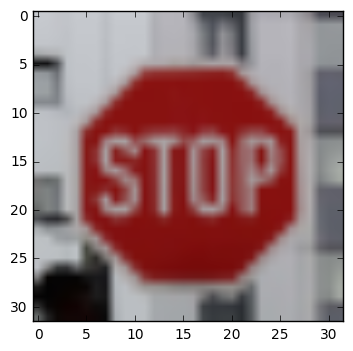

In [54]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
def verify_model_top_three(image_data, sign_dict):
    img_np_data = np.zeros((1, 32, 32, 3))
    img_np_data[0] = image_data
    sess = tf.get_default_session()
    prediction, top_three = sess.run([tf.argmax(fc2, 1), tf.nn.top_k(fc2, 3)], feed_dict={x: img_np_data})
 
    for i in range(0,3):
        prediction = top_three.indices[0][i]
        print("Prediction {0} ==> ClassID: {1} SignName: {2}".format(i, prediction, sign_dict[prediction]))
    print("TOP 3")
    print(top_three)
    plt.imshow(image_data)
    plt.show()

csv_file = "signnames.csv"
sign_dict = generate_sign_dict(csv_file)
with tf.Session() as sess:
    # Load the weights and bias
    saver.restore(sess, save_file)
    # Evaluate on the test data
    test_img_dir = "./test_image"
    for root, dirs, files in os.walk(test_img_dir):
        for file in files:
            file_path = os.path.join(root, file)
            if os.path.splitext(file_path)[-1] == ".jpg":
                print(file)
                img_data = generate_test_data(file_path)
                verify_model_top_three(img_data, sign_dict)
                print("======"*8)

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.